<a href="https://colab.research.google.com/github/SimonHofer11/SeminarIBA/blob/main/Kopie_von_HandsOnDS_Startcode_SS23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Einlesen der Daten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic & visualization modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn modules
from sklearn.model_selection import train_test_split                    # & test split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree  import DecisionTreeClassifier         # decision tree
from sklearn.ensemble import AdaBoostClassifier        # adaboosting
from sklearn.neighbors import KNeighborsClassifier      # knn
from sklearn.ensemble import RandomForestClassifier      # random forest
from sklearn.linear_model import LogisticRegression     # logistic regression
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


from imblearn.over_sampling import SMOTE

In [ ]:
#eigenen Pfad hier einfügen
data = pd.read_csv('/preprocessed_data.csv', sep=',')

### Datenexploration

In [ ]:
data.shape

(6653, 27)



*   ID: Represents a unique identification of an entry 
*   Customer_ID: Represents a unique identification of a person
*   Month: Represents the month of the year
*   Name: Represents the name of a person
*   Age: Represents the age of the person
*   SSN: Represents the social security number of a person
*   Occupation: Represents the occupation of the person
*   Annual_Income: Represents the annual income of the person
*   Monthly_Inhand_Salary: Represents the monthly base salary of a person
*   Num_Bank_Accounts: Represents the number of bank accounts a person holds
*   Num_Credit_Card: Represents the number of other credit cards held by a person
*   Interest_Rate: Represents the interest rate on credit card
*   Num_of_Loan: Represents the number of loans taken from the bank
*   Type_of_Loan: Represents the types of loan taken by a person
*   Delay_from_due_date: Represents the average number of days delayed from the *   payment date
*   Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
*   Changed_Credit_Limit: Represents the percentage change in credit card limit
*   Num_Credit_Inquiries: Represents the number of credit card inquiries
*   Credit_Mix: Represents the classification of the mix of credits
*   Outstanding_Debt: Represents the remaining debt to be paid (in USD)
*   Credit_Utilization_Ratio: Represents the utilization ratio of credit card
*   Credit_History_Age: Represents the age of credit history of the person
*   Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
*   Total_EMI_per_month: Represents the monthly EMI payments (in USD)
Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
*   Payment_Behaviour: Represents the payment behavior of the customer (in USD)
*   Monthly_Balance: Represents the monthly balance amount of the customer (in USD)



In [ ]:
data.head(n=5)

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,1069.440000,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
2,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
3,0x1607,CUS_0xd40,June,23,821-00-0265,Scientist,19114.12,1398.987083,3,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
4,0x1608,CUS_0xd40,July,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49757 entries, 0 to 49756
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49757 non-null  object 
 1   Customer_ID               49757 non-null  object 
 2   Month                     49757 non-null  object 
 3   Age                       49757 non-null  int64  
 4   SSN                       49757 non-null  object 
 5   Occupation                49757 non-null  object 
 6   Annual_Income             49757 non-null  float64
 7   Monthly_Inhand_Salary     49757 non-null  float64
 8   Num_Bank_Accounts         49757 non-null  int64  
 9   Num_Credit_Card           49757 non-null  int64  
 10  Interest_Rate             49757 non-null  int64  
 11  Num_of_Loan               49757 non-null  int64  
 12  Type_of_Loan              49757 non-null  object 
 13  Delay_from_due_date       49757 non-null  int64  
 14  Num_of

In [ ]:
data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49757.000000,49756.000000,49756.000000,49756.000000
mean,33.256848,50556.926071,4201.311203,7.220411,12.663022,59.052073,1.365014,21.117993,14.161002,10.314392,24.769701,1412.001954,32.286686,1178.909023,625.751289,401.175280
std,10.709043,38303.755613,3190.111672,30.335872,68.138153,383.756417,40.351681,14.793501,25.072280,6.722058,172.320390,1143.926094,5.087999,7210.005631,2016.161575,210.761864
min,14.000000,7005.930000,319.556250,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.480000,0.000000,0.540000,20.000000,0.000000,0.000000,0.088628
25%,25.000000,19427.140000,1630.281667,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.250000,3.000000,563.840000,28.077610,31.349970,74.678265,270.323051
50%,33.000000,36963.890000,3084.106667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.370000,6.000000,1148.570000,32.321065,69.586247,136.234539,336.594560
75%,41.000000,71703.220000,5972.078333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.810000,9.000000,1926.700000,36.503076,162.401814,266.450840,468.406055
max,100.000000,273093.000000,14978.336667,744.000000,999.000000,4998.000000,1096.000000,65.000000,996.000000,29.990000,2399.000000,4949.890000,44.992922,74926.000000,10000.000000,1602.040519


<ipython-input-15-d3ab1b346ca8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cbar = True,cmap = 'GnBu', annot =True, linewidths=4, linecolor='white')


<Axes: >

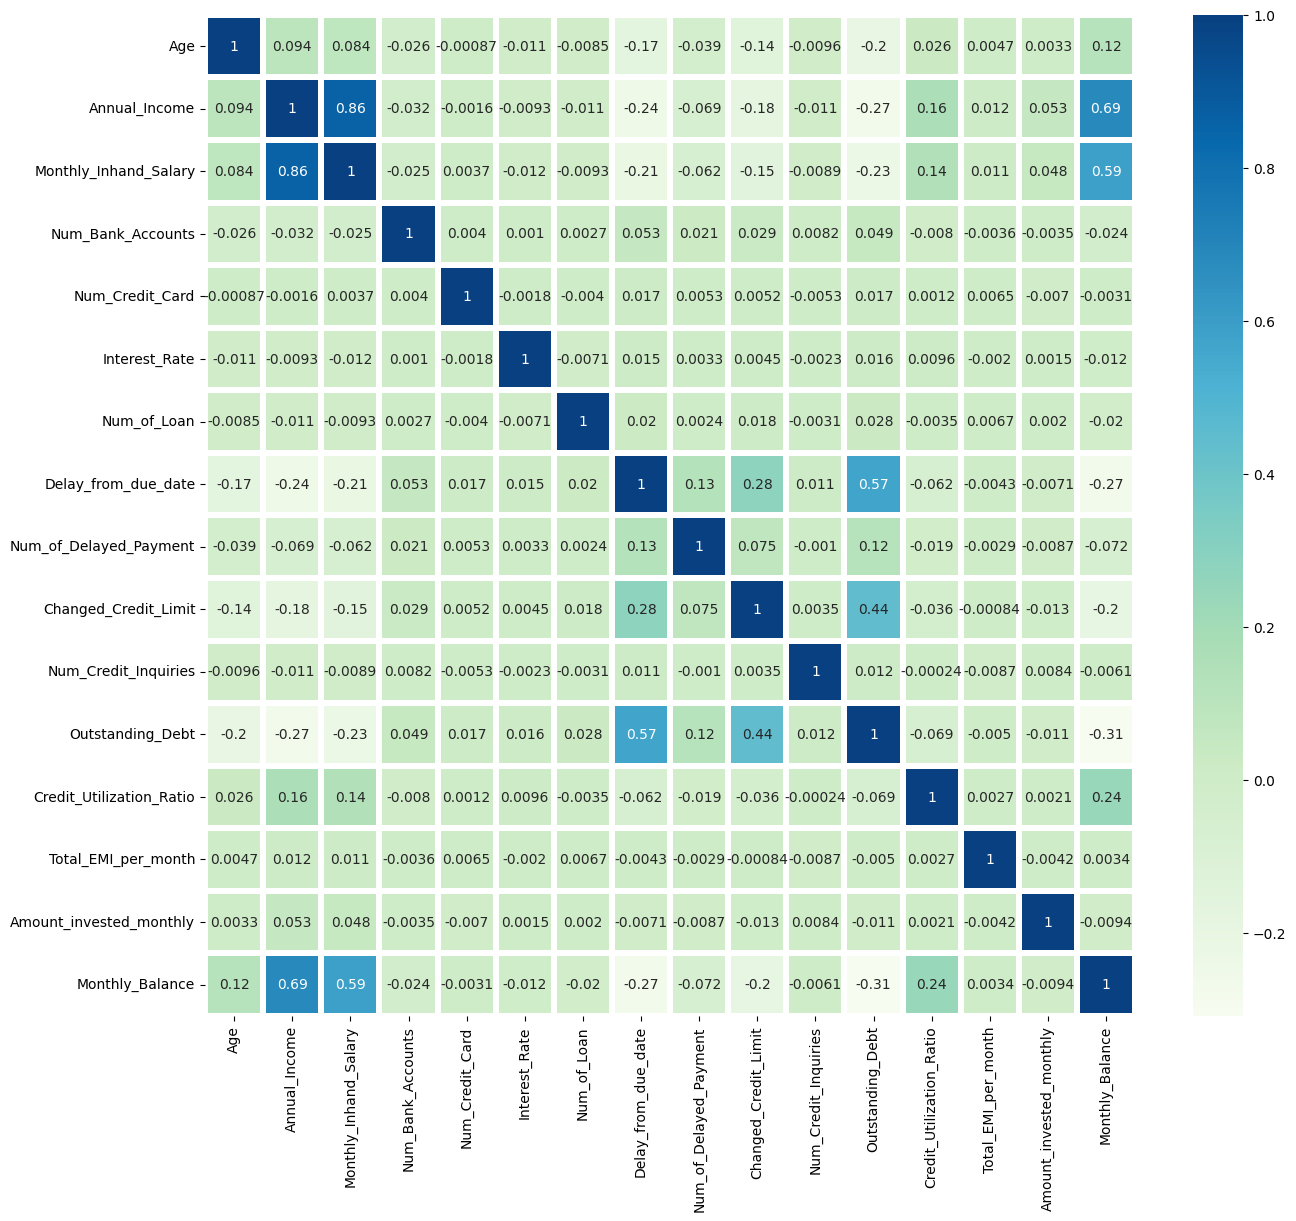

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(),cbar = True,cmap = 'GnBu', annot =True, linewidths=4, linecolor='white')

### Preprocessing

In [ ]:
data.drop(['ID', 'Customer_ID'], axis=1, inplace=True)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in data.columns:
  if data[column].dtypes == 'object':
    data[column] = ordinal_encoder.fit_transform(data[[column]])

In [ ]:
data.Annual_Income = (data.Annual_Income - data.Annual_Income.mean())/data.Annual_Income.std()
data.Monthly_Inhand_Salary = (data.Monthly_Inhand_Salary - data.Monthly_Inhand_Salary.mean())/data.Monthly_Inhand_Salary.std()
data.Type_of_Loan = (data.Type_of_Loan - data.Type_of_Loan.mean())/data.Type_of_Loan.std()
data.Outstanding_Debt = (data.Outstanding_Debt - data.Outstanding_Debt.mean())/data.Outstanding_Debt.std()
data.Credit_History_Age = (data.Credit_History_Age - data.Credit_History_Age.mean())/data.Credit_History_Age.std()
data.Total_EMI_per_month = (data.Total_EMI_per_month - data.Total_EMI_per_month.mean())/data.Total_EMI_per_month.std()
data.Amount_invested_monthly = (data.Amount_invested_monthly - data.Amount_invested_monthly.mean())/data.Amount_invested_monthly.std()

In [ ]:
data.head(n=5)

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3.0,23,5561.0,12.0,-0.820881,-0.744948,3,4,3,4,...,3.0,-0.526277,26.822620,-0.141069,1.0,-0.156634,-0.270482,3.0,312.494089,0.0
1,0.0,23,5561.0,12.0,-0.820881,-0.981743,3,4,3,4,...,1.0,-0.526277,31.377862,-0.095854,1.0,-0.156634,-0.211438,6.0,223.451310,0.0
2,7.0,23,5561.0,12.0,-0.820881,-0.744948,3,4,3,4,...,1.0,-0.526277,24.797347,-0.086811,1.0,-0.156634,-0.289824,2.0,341.489231,0.0
3,5.0,23,5561.0,12.0,-0.820881,-0.878441,3,4,3,4,...,1.0,-0.526277,27.262259,-0.077768,1.0,-0.156634,-0.279403,0.0,340.479212,0.0
4,4.0,23,5561.0,12.0,-0.820881,-0.744948,3,4,3,4,...,1.0,-0.526277,22.537593,-0.068725,1.0,-0.156634,-0.221910,6.0,244.565317,0.0


### verschiedene Klassifikationsmodelle

In [ ]:
data = clean_dataset(data)

<ipython-input-17-19e362bcb334>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


In [ ]:
x = data.drop('Credit_Score',axis=1).values
y = data['Credit_Score'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state=2806)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(44780, 24) (4976, 24) (44780,) (4976,)


In [ ]:
data = data.reset_index()

#### Decision Tree
https://de.wikipedia.org/wiki/Entscheidungsbaum <br>
https://www.youtube.com/watch?v=ZVR2Way4nwQ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
dc = DecisionTreeClassifier(max_depth=30)
dc.fit(x_train, y_train)
print(dc.score(x_test, y_test))

0.6904946331747261


#### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier <br>
https://en.wikipedia.org/wiki/Random_forest


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.7823392718822618

#### Extra Tree Classifier (ähnlich wie Random Forrest)
https://www.youtube.com/watch?v=Q1qpG7gwix4 <br>
https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/

In [ ]:
ETC_Updated= ExtraTreesClassifier(n_estimators = 2000,bootstrap = True)
ETC_Updated.fit(x_train, y_train)
ETC_Updated.score(x_test,y_test)

0.7682877813504824

#### Support Vector Machine
https://de.wikipedia.org/wiki/Support_Vector_Machine <br>
https://www.youtube.com/watch?v=_YPScrckx28 <br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [ ]:
svm_class = svm.SVC()
svm_class.fit(x_train, y_train)
y_pred = svm_class.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5259244372990354


#### Naive-Bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB <br>
https://en.wikipedia.org/wiki/Naive_Bayes_classifier


In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_test, y_test)

0.572347266881029

#### Ada-Boost-Classifier
https://en.wikipedia.org/wiki/AdaBoost <br>
https://www.youtube.com/watch?v=GM3CDQfQ4sw <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=ada#sklearn.ensemble.AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(base_estimator=dc, n_estimators=75)
ada.fit(x_train, y_train)
ada.score(x_test, y_test)

NameError: ignored

#### knn-Classifier (k nearest neigbors)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier <br>
https://www.youtube.com/watch?v=HVXime0nQeI

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.5789790996784566

#### Gradient Boost Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier <br>
https://www.youtube.com/watch?v=jxuNLH5dXCs


In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb.score(x_test, y_test)

0.702572347266881

#### Neuronale Netze

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlp <br>
https://www.youtube.com/watch?v=aircAruvnKk <br>
https://www.youtube.com/watch?v=bfmFfD2RIcg


In [ ]:
mlp = MLPClassifier(activation='tanh', max_iter=1000)
mlp.fit(x_train, y_train)
mlp.score(x_test, y_test)

0.6266077170418006

#### Balancing the dataset

https://www.youtube.com/watch?v=U3X98xZ4_no <br>
https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

In [ ]:
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [ ]:
rf_smt = RandomForestClassifier()
rf_smt.fit(x_train_smt, y_train_smt)
rf_smt.score(x_test, y_test)

0.7757234726688103